# Run scrublet inputs for single sample
**Authorship:** Adam Klie (last updated: 10/02/2023)<br>
***
**Description:**
Adapted from Mei's notebook for doing this

# Set-up

In [1]:
# Import libraries
import os
import sys
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scrublet as scr

In [2]:
# Plotting
%matplotlib inline

In [3]:
# Files
in_dir = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/14Sep23"
counts_file = os.path.join(in_dir, "igvf_dm32a.qc.mtx")
genes_file = os.path.join(in_dir, "igvf_dm32a.qc.genes.tsv")
barcodes_file = os.path.join(in_dir, "igvf_dm32a.qc.barcodes.tsv")
out_file = os.path.join(in_dir, "igvf_dm32a.qc.scrublet_doublets.txt")

In [4]:
# Load count matrix and genes
counts_matrix = scipy.io.mmread(counts_file).T.tocsc()
genes = np.array(scr.load_genes(genes_file, delimiter='\t', column=0))

In [5]:
# Set-up the scrublet object
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.05)

In [6]:
# Run scublet
doublet_scores, predicted_doublets = scrub.scrub_doublets(
    min_counts=2, 
    min_cells=3, 
    min_gene_variability_pctl=85, 
    n_prin_comps=30
)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 7.5%
Elapsed time: 2.4 seconds


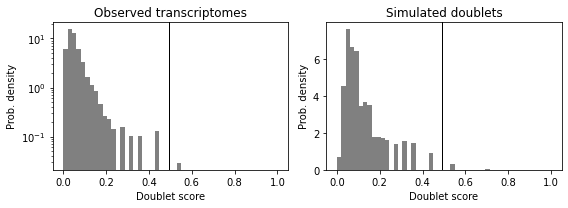

In [7]:
# Plot a histogram of the doublet scores
scrub.plot_histogram();
plt.show()

In [8]:
# Check how many were predicted as doublets
np.unique(predicted_doublets, return_counts=True)

(array([False,  True]), array([3404,    2]))

In [9]:
# Do scrublets umap
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

Running UMAP...


/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/cellar/users/aklie/opt/mi

(<Figure size 576x288 with 3 Axes>,
 array([<Axes: title={'center': 'Predicted doublets'}, xlabel='UMAP 1', ylabel='UMAP 2'>,
        <Axes: title={'center': 'Doublet score'}, xlabel='UMAP 1', ylabel='UMAP 2'>],
       dtype=object))

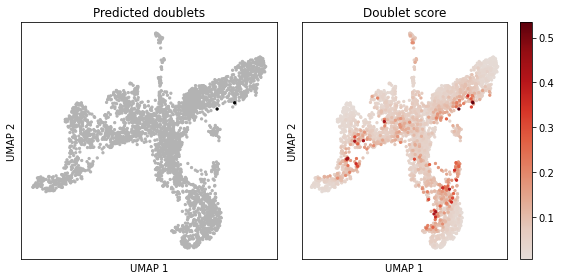

In [10]:
# Plot scublets umap
scrub.plot_embedding('UMAP', order_points=True)

In [11]:
# Load in the barcodes
barcodes = pd.read_csv(barcodes_file, sep="\t", header=None)[0].values

In [12]:
# How many barcodes, doublet scores, and predicted doublets
len(barcodes), len(doublet_scores), len(predicted_doublets)

(3406, 3406, 3406)

In [13]:
# Make a dataframe of the barcodes, doublet scores, and predicted doublets
doublet_df = pd.DataFrame({
    "barcode": barcodes,
    "doublet_score": doublet_scores,
    "predicted_doublet": predicted_doublets
})

In [14]:
# Save the dataframe
doublet_df.to_csv(out_file, sep="\t", index=False)

# DONE!

---